# A GUIDE FOR CREATING PIE CHARTS

### How to build pie charts using matplotlib

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='TOP GOALSCORERS - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Rank,Player,Club,Nationality,Stat
0,1,Jamie Vardy,Leicester City,England,17.0
1,2,Pierre-Emerick Aubameyang,Arsenal,Gabon,12.0
2,3,Tammy Abraham,Chelsea,England,11.0
3,3,Danny Ings,Southampton,England,11.0
4,3,Marcus Rashford,Manchester United,England,11.0


In [2]:
df_score = df_data_1.head(15)

In [3]:
df_score.head()

,Rank,Player,Club,Nationality,Stat
0,1,Jamie Vardy,Leicester City,England,17.0
1,2,Pierre-Emerick Aubameyang,Arsenal,Gabon,12.0
2,3,Tammy Abraham,Chelsea,England,11.0
3,3,Danny Ings,Southampton,England,11.0
4,3,Marcus Rashford,Manchester United,England,11.0


In [4]:
df_score_1 = df_score.groupby('Club').sum()

In [5]:
df_score_1

,Stat
Club,
Arsenal,12.0
Brighton and Hove Albion,7.0
Burnley,7.0
Chelsea,11.0
Leicester City,17.0
Liverpool,18.0
Manchester City,20.0
Manchester United,11.0
Norwich City,9.0


In [6]:
df_score_2 = df_score_1.sort_values('Stat', ascending = False)

In [7]:
df_score_2 = df_score_2.head()

In [8]:
df_score_2.head()

,Stat
Club,
Manchester City,20.0
Liverpool,18.0
Leicester City,17.0
Tottenham Hotspur,16.0
Arsenal,12.0


In [9]:
## Import data visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

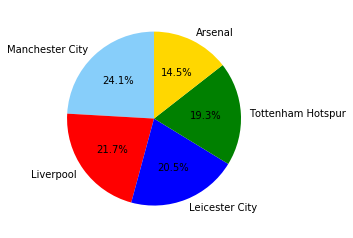

In [10]:
labels = df_score_2.index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
plt.pie(df_score_2['Stat'], labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

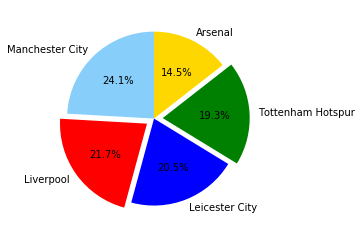

In [11]:
## for exploding the pie chart
labels = df_score_2.index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0,0.1,0,0.1,0)
fig1, ax1 = plt.subplots()
plt.pie(df_score_2['Stat'], explode = explode,labels= labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

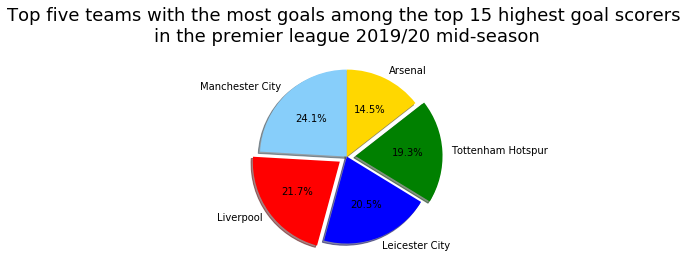

In [12]:
## Adding a title to the pie chart and a shadow to the chart
labels = df_score_2.index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0,0.1,0,0.1,0)
plt.pie(df_score_2['Stat'], explode = explode,labels= labels, colors=colors, startangle=90, autopct='%.1f%%', shadow = True)
plt.title("Top five teams with the most goals among the top 15 highest goal scorers \nin the premier league 2019/20 mid-season", fontsize = 18)
plt.show()

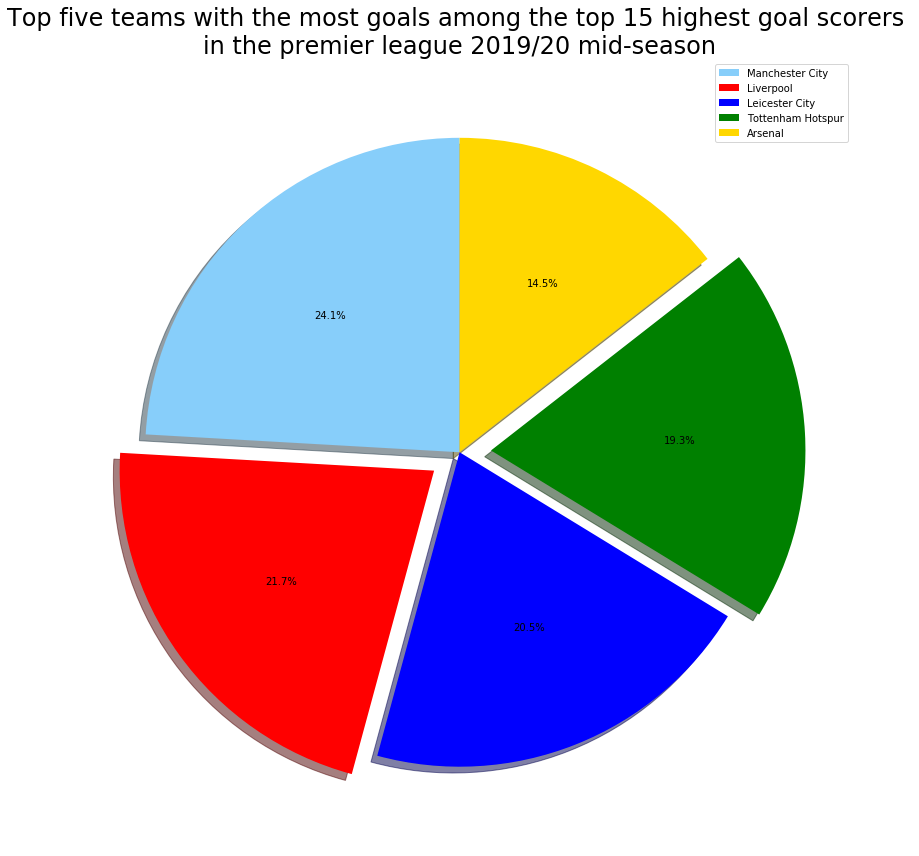

In [13]:
## Adding a legend to the chart and increasing its size
labels = df_score_2.index
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0,0.1,0,0.1,0)
fig, ax1 = plt.subplots(figsize = (24,12))
ax1.pie(df_score_2['Stat'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True)
plt.title("Top five teams with the most goals among the top 15 highest goal scorers \nin the premier league 2019/20 mid-season", fontsize = 24)
ax1.legend(labels, loc = "upper right")
plt.tight_layout()
plt.show()